<a href="https://colab.research.google.com/github/Qualot/deep-learning-from-scratch/blob/colab/ch03/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd
!git clone https://github.com/Qualot/deep-learning-from-scratch.git zerotsuku
!ls zerotsuku

/content
Cloning into 'zerotsuku'...
remote: Enumerating objects: 594, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 594 (delta 54), reused 0 (delta 0), pack-reused 514
Receiving objects: 100% (594/594), 9.93 MiB | 28.88 MiB/s, done.
Resolving deltas: 100% (331/331), done.
ch01  ch03  ch05  ch07	common	 environment.yml  notebooks
ch02  ch04  ch06  ch08	dataset  LICENSE.md	  README.md


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

##dataset ... eliminated due to install problems

In [3]:
#!pip3 install dataset
#from dataset.mnist import load_mnist

In [4]:
#https://marshmallow444.github.io/tech_blog/2021/08/09/zero-tsuku-chpt3.html
from keras.datasets import mnist

In [5]:
np.set_printoptions(linewidth=10000)

In [6]:
def step_function_numpy_not_available(x):
  if x > 0:
    return 1
  else:
    return 0

In [7]:
x = np.arange(-5, 5, 0.1)
print(x)
#y = step_function_numpy_not_available(x)

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00  1.2000

In [8]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [9]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)

[-1.  1.  2.]
[False  True  True]


In [10]:
y = y.astype(int)
print(y)

[0 1 1]


<ipython-input-8-0fc41ff81b35>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


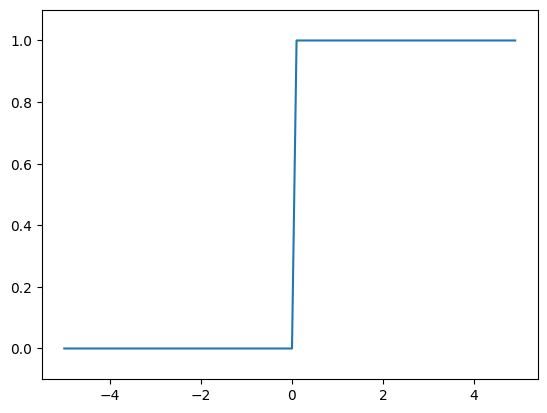

In [11]:
x = np.arange(-5,5,0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [12]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [14]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


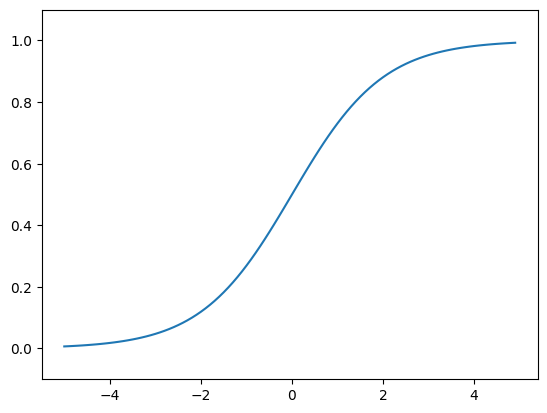

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [16]:
def relu(x):
  return np.maximum(0, x)

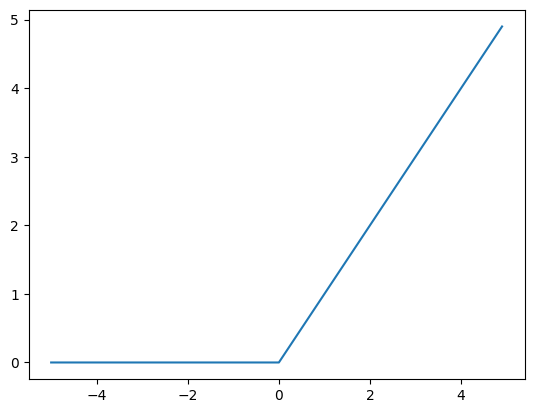

In [17]:
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

In [18]:
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [19]:
B = np.array([[1, 2], [3, 4]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0])

[[1 2]
 [3 4]]
2
(2, 2)
2


In [20]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(np.dot(A, B))

[[19 22]
 [43 50]]


In [21]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [22]:
X = np.array([1, 2])
print(X)
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)
print(Y.shape)

[1 2]
(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]
(3,)


In [23]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [24]:
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [25]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [26]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [27]:
def identity_function(x):
  return x

In [28]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [29]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


In [30]:
def init_network_example():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network


def forward_example(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y


network = init_network_example()
x = np.array([1.0, 0.5])
y = forward_example(network, x)
print(y)


[0.31682708 0.69627909]


In [31]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [32]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

<ipython-input-32-23103c906500>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-32-23103c906500>:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [33]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [34]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [35]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [36]:
a = np.array([0.3, 2.9, 4.0])
y =softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [37]:
sample_vector_1x2=np.array([1, 2])
sample_vector_2x1=np.array([[1], [2]])
print(sample_vector_1x2.shape)
print(sample_vector_2x1.shape)

(2,)
(2, 1)


In [38]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# それぞれのデータの形状を出力
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [39]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [40]:
print(t_test[0])

7


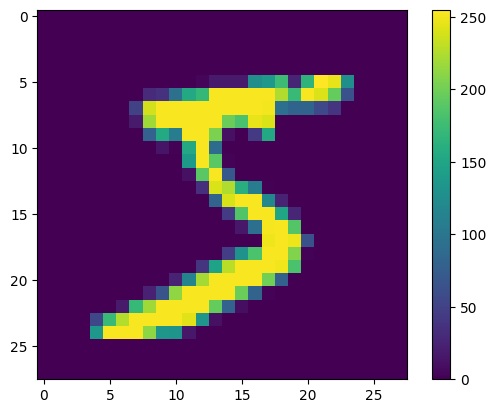

In [41]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [42]:
def get_data():
  #when using dataset library
  #  (x_train, t_train), (x_test, t_test) = mnist.load_data(normalize=True, flatten=True, one_hot_label=False)
  (x_train, t_train), (x_test, t_test) = mnist.load_data()

  #normalize
  x_train, x_test = x_train / 255.0, x_test / 255.0

  #flatten
  x_train, t_train, x_test, t_test = [arr.reshape(arr.shape[0], -1) for arr in (x_train, t_train, x_test, t_test)]
  print(f"x_train.shape is ... {x_train.shape}")
  print(f"t_train.shape is ... {t_train.shape}")
  print(f"x_test.shape is ... {x_test.shape}")
  print(f"t_test.shape is ... {x_test.shape}")

  return x_test, t_test

In [43]:
x, t = get_data()
print()
print(x.shape)
print(x[0])

x_train.shape is ... (60000, 784)
t_train.shape is ... (60000, 1)
x_test.shape is ... (10000, 784)
t_test.shape is ... (10000, 784)

(10000, 784)
[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.    

In [44]:
orig_xy_size = np.sqrt(x[0].shape)
orig_xy_size = int(orig_xy_size[0])

print(x[0].shape)
print(orig_xy_size)
print(t[0].shape)

(784,)
28
(1,)


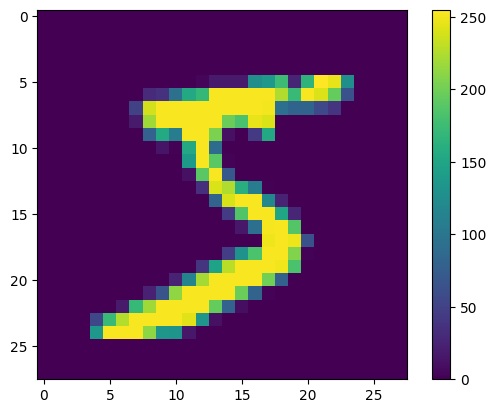

In [45]:
plt.figure()
plt.imshow(x_train[0].reshape(orig_xy_size, orig_xy_size))
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
def init_network():
  with open("zerotsuku/ch03/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

In [47]:
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

### for loop w/o batch

In [48]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
print(len(x))
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

x_train.shape is ... (60000, 784)
t_train.shape is ... (60000, 1)
x_test.shape is ... (10000, 784)
t_test.shape is ... (10000, 784)
10000
Accuracy:0.9352


In [49]:
### w/o for loop but batch using numpy slice

In [50]:
x, t = get_data()
network = init_network()

batch_size = 100 #batch number
accuracy_cnt = 0
print(len(x))
for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])


print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

x_train.shape is ... (60000, 784)
t_train.shape is ... (60000, 1)
x_test.shape is ... (10000, 784)
t_test.shape is ... (10000, 784)
10000
Accuracy:10.5745


In [51]:
alist = list(range(0, 10))
blist = list(range(0, 10, 3))

print(alist)
print(blist)

print(alist[:3])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]
[0, 1, 2]


In [52]:
x_sample = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x_sample)
y_sample = np.argmax(x_sample, axis=0) # columns
#y_sample = np.argmax(x_sample, axis=1) # rows
print(y_sample)

[[0.1 0.8 0.1]
 [0.3 0.1 0.6]
 [0.2 0.5 0.3]
 [0.8 0.1 0.1]]
[3 0 1]


In [53]:
### from ChatGPT

In [61]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
print(f"x.shape is ... {x.shape}")
print(f"t.shape is ... {t.shape}")

#lenx = len(x)
lenx = 1000

for i in range(0, lenx, batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    t_batch = t[i:i + batch_size]
    t_batch = t_batch[:,0]

    # Debug: Ensure that predictions are within expected range
    #print("Min y_batch:", np.min(y_batch))
    #print("Max y_batch:", np.max(y_batch))

    p = np.argmax(y_batch, axis=1)
    boolean_softmax = p == t_batch
    #string_softmax = np.array(['t' if x else 'f' for x in boolean_softmax])
    string_softmax = np.where(boolean_softmax, 't', 'f')
    int_softmax = boolean_softmax.astype(int)

    #print(f"from {i}th ...shape:{p.shape} sum:{np.sum(p == t[i:i + batch_size])}")
    print(f"p ... {p.T}")
    print(f"t ... {t[i:i + batch_size].T}")
    print(f"p_batch ... {p.T} ... (Actually p. only for comparison)")
    print(f"t_batch ... {t_batch.T}")
    print(f"int_softmax ... {int_softmax.T}")

    #print(f"{p == t[i:i + batch_size]}")
    #print(f"{string_softmax}")
    print(f"p.shape ... {p.shape}")
    print(f"t.shape ... {t[i:i + batch_size].shape}")
    print(f"t_batch.shape ... {t_batch.shape}")
    print(f"boolean_softmax ... {boolean_softmax.shape}")
    print(f"int_softmax ... {int_softmax.shape}")
    print(f"int_softmax_sum ... {np.sum(int_softmax)}")

    print("")


    #print(f"from {i}th ...shape:{p.shape} sum:{np.sum(p == t[i:i + batch_size])} ... {p}")
    #print(f"from {i}th ...shape:{p.shape} sum:{np.sum(p)} ... {p}")
    #print(p.shape)
    #print(np.sum(p == t[i:i + batch_size]))

    #accuracy_cnt += np.sum(p == t[i:i + batch_size])
    accuracy_cnt += np.sum(int_softmax)

   # print(accuracy_cnt)

#print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print("Accuracy:" + str(float(accuracy_cnt) / lenx))

x_train.shape is ... (60000, 784)
t_train.shape is ... (60000, 1)
x_test.shape is ... (10000, 784)
t_test.shape is ... (10000, 784)
x.shape is ... (10000, 784)
t.shape is ... (10000, 1)
p ... [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 2 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9]
t ... [[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]]
p_batch ... [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 2 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9] ... (Actually p. only for comparison)
t_batch ... [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4

In [66]:
y_boolean_sample = np.array([1, 2, 1, 0])
t_boolean_sample = np.array([[1, 2, 0, 0, 8, 8, 3, 0, 1, 4, 6, 5]])
#t_boolean_sample = np.array([[1, 2, 0, 0]])
#accuracy_cnt += np.sum(p == t[i:i + batch_size])
print(y_boolean_sample.shape)
print(t_boolean_sample.shape)

print(y_boolean_sample == t_boolean_sample)
print(np.sum(y_boolean_sample == t_boolean_sample))
print()

print(f"t_boolean_sample[0:4] is {t_boolean_sample[0:4]}")
print(y_boolean_sample == t_boolean_sample[0:4])
print(np.sum(y_boolean_sample == t_boolean_sample[0:4]))

(4,)
(1, 12)
False
0

t_boolean_sample[0:4] is [[1 2 0 0 8 8 3 0 1 4 6 5]]
False
0


<ipython-input-66-072cf47de831>:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(y_boolean_sample == t_boolean_sample)
<ipython-input-66-072cf47de831>:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.sum(y_boolean_sample == t_boolean_sample))
<ipython-input-66-072cf47de831>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(y_boolean_sample == t_boolean_sample[0:4])
<ipython-input-66-072cf47de831>:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.sum(y_boolean_sample == t_boolean_sample[0:4]))
